# Exercici 1

L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.

L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".

Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [2]:
import pandas as pd
import numpy as np 
import re 

In [3]:
pd.set_option("display.max_colwidth", None)
df = pd.read_table("Web_access_log-akumenius.com.txt", names = ["1"])
df.head()

,1
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"


* The first item is the web address where the request originated.  In the first row, it would be localhost.

* The next item is the IP address of the client. It is composed of numbers and three dots. In the first row it would be 127.0.0.1.

* The first hyphen after the IP address is the RFC 1413 identity, which is not available, hence the hyphen.

* The next hyphen is the user id of the requester. It is not available either, in this case because the information accessed is not password protected.

* The fifth item is the date and time with timezone between brackets, and it is the time when the request was received. The format is DD-Mon-YYYY hh:mm:ss and timezone.

* After that, we can find the request line in quotes. It can also be divided into three parts. The first is a word in capital letters and it is the method used by the client. In the first row, it is OPTIONS. The second part, in the first row represented by an asterisk, is the resource requested, and the third part is the protocol used. In the first row, it is "HTTP/1.0".

* The following three figure number is the status code sent from the server to the client. If it begins with 2, it is a successful response; with 3, it is a redicrection; with 4, an error caused by the client; and with 5, an error caused by the server. 

* After that, we find the size of the object returned to the client. It can be a number, or a hyphen in the case nothing is returned. 

* Next, we can find the referer. It is the page that linked to the current address. In the first row it is a hyphen because there isn't a referer.

* The last part, found between quotes, is the User Agent which identifies the browser the client used. 

* This will be much clearer when separated into columns further down. 

# Exercici 2

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [4]:
#divide into columns where there is "
col = df["1"].apply(lambda column:re.findall("[^\"]*", column))
col.head()

0    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
1    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
2    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
3    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
4    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
Name: 1, dtype: object

In [5]:
#create new column called web
df["web"] = col.map(lambda column:column[0].split(" ")[0])
df.head()

,1,web
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost


In [6]:
# \d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3} ip numbers between the dots can go from 0 to 255
#create new column for ip address
df["ip"] = col.map(lambda column:re.search("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}", column[0]).group())
df.head()

,1,web,ip
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1


In [7]:
#create date column
df["date"] = col.map(lambda column:re.search("\d{1,2}/[A-Za-z]{3}/\d{4}", column[0]).group())
df.head()

,1,web,ip,date
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014


In [8]:
#create time column
df["time"] = col.map(lambda column:re.search("\d{2}:\d{2}:\d{2}", column[0]).group())
df.head()

,1,web,ip,date,time
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10


In [9]:
#create timezone column
df["timezone"] = col.map(lambda column:re.search("(\+|\-)\d{4}", column[0]).group())
df.head()

,1,web,ip,date,time,timezone
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100


In [10]:
#create column for request line and divide into method, resource requested, and protocol
df["r"] = col.map(lambda column:column[2])
df[["method", "request", "protocol"]] = df["r"].str.split(expand = True)
df = df.drop(["r"], axis = 1)
df.head() 

,1,web,ip,date,time,timezone,method,request,protocol
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0


In [11]:
#create status code and size of the object returned column, then split them
df["num"] = col.map(lambda column:column[4])
df[["status", "size"]] = df["num"].str.split(expand = True)
df = df.drop(["num"], axis = 1)
df.tail()

,1,web,ip,date,time,timezone,method,request,protocol,status,size
261868,"www.akumenius.com 5.255.253.53 - - [02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" 200 7528 ""-"" ""Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)"" VLOG=-",www.akumenius.com,5.255.253.53,02/Mar/2014,14:03:05,+0100,GET,/,HTTP/1.1,200,7528
261869,"www.akumenius.com 74.86.158.107 - - [02/Mar/2014:03:09:52 +0100] ""HEAD / HTTP/1.1"" 200 - ""-"" ""Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/)"" VLOG=-",www.akumenius.com,74.86.158.107,02/Mar/2014,14:03:09,+0100,HEAD,/,HTTP/1.1,200,-
261870,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,02/Mar/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-
261871,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,02/Mar/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-
261872,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,02/Mar/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-


In [12]:
#create column for referer page
df["referer"] = col.map(lambda column:column[6])
df.head()

,1,web,ip,date,time,timezone,method,request,protocol,status,size,referer
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-


In [13]:
#10
#create browser column
df["browser"] = col.map(lambda column:column[10])
df.head()

,1,web,ip,date,time,timezone,method,request,protocol,status,size,referer,browser
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)


In [14]:
df = df.drop(["1"], axis = 1)
df.head()

,web,ip,date,time,timezone,method,request,protocol,status,size,referer,browser
0,localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,23/Feb/2014,14:03:10,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)


# Exercici 3

Geolocalitza les IP's.

In [21]:
ip_visits = df["ip"].value_counts().rename_axis("ip").reset_index(name = "visits")
#exclude localhost & ips with less than 1000 visits
ip_visits = ip_visits[(ip_visits["ip"] != "127.0.0.1") & (ip_visits["visits"] > 1000)]
ip_visits.head()

,ip,visits
0,66.249.76.216,46382
1,80.28.221.123,14725
3,217.125.71.222,5201
4,66.249.75.148,3558
5,162.243.192.191,2927


In [16]:
from ip2geotools.databases.noncommercial import DbIpCity

In [17]:
# https://stackoverflow.com/questions/10339351/how-can-i-geolocate-a-bunch-of-ip-addresses-with-python
def ip_city(ip):
    try:
        return DbIpCity.get(ip, api_key = "free").city
    except:
        return np.nan 
    
def ip_region(ip):
    try:
        return DbIpCity.get(ip, api_key = "free").region
    except:
        return np.nan 
    
def ip_country(ip):
    try:
        return DbIpCity.get(ip, api_key = "free").country
    except:
        return np.nan 
    
def ip_latitude(ip):
    try:
        return DbIpCity.get(ip, api_key = "free").latitude
    except:
        return np.nan 
    
def ip_longitude(ip):
    try:
        return DbIpCity.get(ip, api_key = "free").longitude 
    except:
        return np.nan 

In [18]:
ip_visits["city"] = ip_visits.loc[:, "ip"].apply(ip_city)
ip_visits["region"] = ip_visits.loc[:, "ip"].apply(ip_region)
ip_visits["country"] = ip_visits.loc[:, "ip"].apply(ip_country)
ip_visits["latitude"] = ip_visits.loc[:, "ip"].apply(ip_latitude)
ip_visits["longitude"] = ip_visits.loc[:, "ip"].apply(ip_longitude)
ip_visits.head()

,ip,visits,city,region,country,latitude,longitude
0,66.249.76.216,46382,Mountain View,California,US,37.389389,-122.083210
1,80.28.221.123,14725,Madrid,Madrid,ES,40.416705,-3.703582
3,217.125.71.222,5201,Madrid,Madrid,ES,40.416705,-3.703582
4,66.249.75.148,3558,Mountain View,California,US,37.389389,-122.083210
5,162.243.192.191,2927,New York,New York,US,40.712728,-74.006015


In [21]:
ip_visits.to_csv("ip_visits.csv")

# Exercici 4

Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

I made a visualization on Tableau using the locations found and the number of visits from each place. In case there's an issue with the embedded code, the visualization can be found here: https://public.tableau.com/views/Webvisits/Sheet1?:language=es-ES&:display_count=n&:origin=viz_share_link
Or here it is in png format:
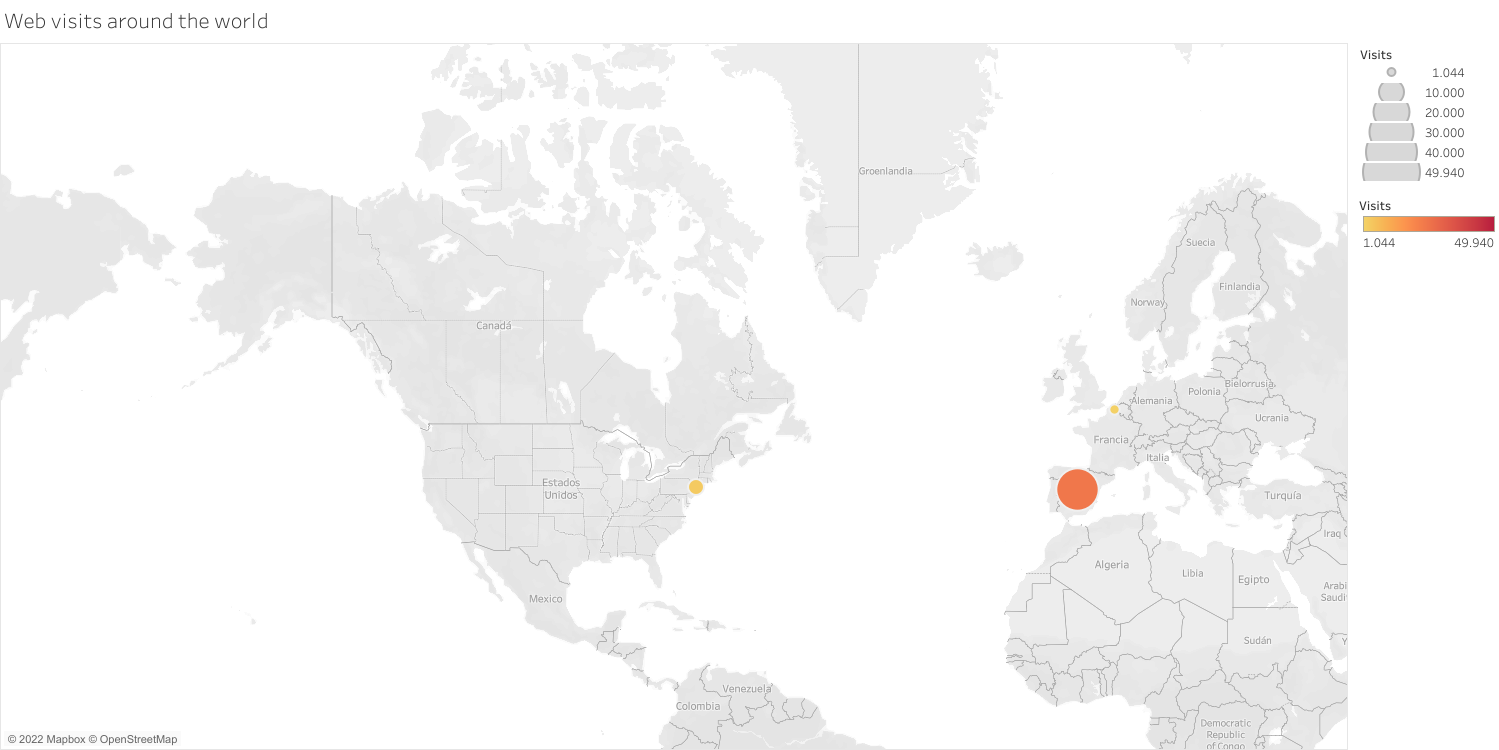

In [25]:
%%html
<div class='tableauPlaceholder' id='viz1649540838646' style='position: relative'><noscript><a href='#'><img alt='Web visits around the world ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;Webvisits&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Webvisits&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;Webvisits&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='es-ES' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649540838646');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Most of the visitors come from Spain, especifically Madrid. There are also some visitors from Northern France and Eastern United States, but it seems only Westerners visit the web page.